# MLP Training

In this notebook we train our MLP and use different visualizations to show our training steps and results.

In [1]:
import numpy as np
from perceptron import Perceptron
from eval import sigmoidprime , sigmoid
from mlp import MLP
from dataset import random_data
from training import *
import matplotlib.pyplot as plt

# XOR

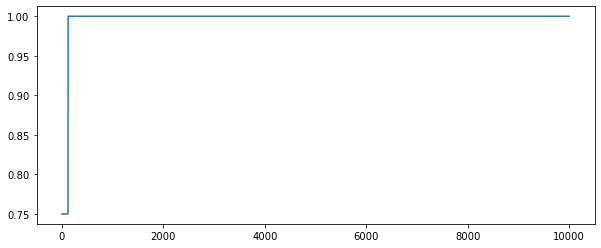

Our data is: [1 0], the target is 1, our mlp returns 0.9965373564690522
Our data is: [1 1], the target is 0, our mlp returns 0.0053082673966877965
Our data is: [0 0], the target is 1, our mlp returns 0.9979496852388715
Our data is: [0 1], the target is 1, our mlp returns 0.996207221059594


In [2]:
our_nn = MLP(depth=3)
train(our_nn,random_data(kind="xor"),times=10000)

# AND


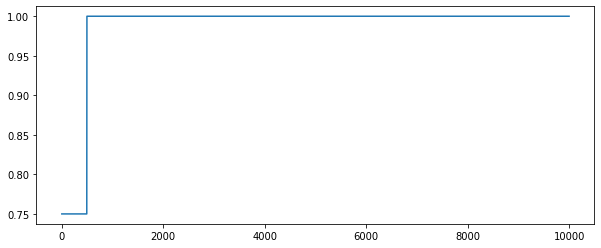

TypeError: float() argument must be a string or a number, not 'list'

In [3]:
our_nn = MLP(depth=3)
train(our_nn,random_data(kind="and"),times=10000)

# NAND

In [ ]:
our_nn = MLP(depth=3)
train(our_nn,random_data(kind="nand"),times=10000)

# NOR


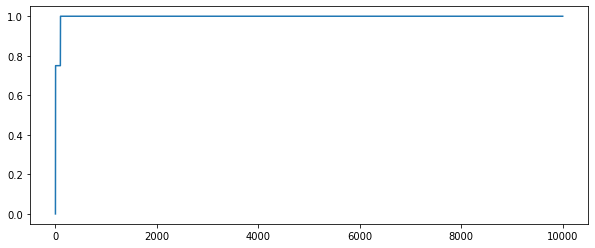

Our data is: [1 0], the target is 0, our mlp returns [0.003162169724495903]
Our data is: [1 1], the target is 0, our mlp returns [0.002111264761814948]
Our data is: [0 0], the target is 1, our mlp returns [0.9945427049294361]
Our data is: [0 1], the target is 0, our mlp returns [0.0031387585241211243]


In [5]:
our_nn = MLP(depth=3)
train(our_nn,random_data(kind="nor"),times=10000)

# OR

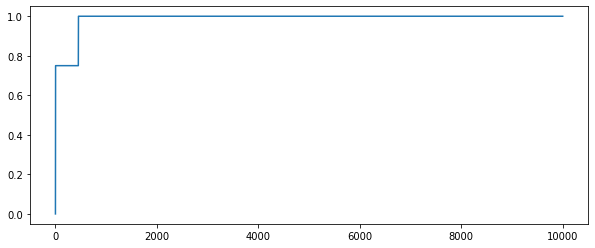

Our data is: [1 0], the target is 1, our mlp returns [0.99630592590017]
Our data is: [1 1], the target is 1, our mlp returns [0.9974475938553312]
Our data is: [0 0], the target is 0, our mlp returns [0.00547999484716994]
Our data is: [0 1], the target is 1, our mlp returns [0.9966378641702999]


In [6]:
our_nn = MLP(depth=3)
train(our_nn,random_data(kind="or"),times=10000)

# Live training of our MLP
<br> <br>
Live training with depth 3, iterations 10000, stepsize of 100.

<IPython.core.display.Javascript object>


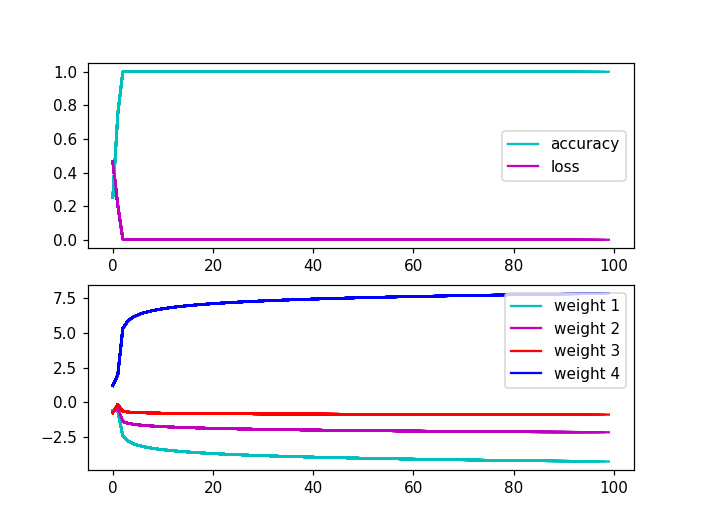

In [15]:
# setting our graph
plt.rcParams['animation.html'] = 'jshtml'
fig ,(ax1, ax2) = plt.subplots(2)
fig.show()

def live_training(mlp,data,times= 10000, steps_for_live = 100):
    """ Vizualizes the training or our MLP in realtime.
        ## Params:
        
        -   mlp = object of class MLP
        -   data = data from dataset.py ("and", "or", "nand", "nor, "xor)
        -   times = iterations
        -   steps_for_live = stepsize
    
    """
    
    erg1=[]
    erg2=[]
    weights_of_first_neuron = [[],[],[],[]]
    x_axes= np.linspace(0,10000,num=times)
    
    for i in range(0,len(x_axes)):
        acuracy, error = live_epoch(mlp,data)
        
        if i % steps_for_live == 0:

            erg1.append(acuracy)
            erg2.append(error)

            for z in range(0,4):
                weights_of_first_neuron[z].append(mlp.output_layer[0].weights[z])

            ax1.plot(range(len(weights_of_first_neuron[0])), erg1,color="c",label="accuracy")
            ax1.plot(range(len(weights_of_first_neuron[0])), erg2,color="m",label="loss")

            ax2.plot(range(len(weights_of_first_neuron[0])) , weights_of_first_neuron[0],color="c",label="weight 1")
            ax2.plot(range(len(weights_of_first_neuron[0])) , weights_of_first_neuron[1],color="m",label="weight 2")
            ax2.plot(range(len(weights_of_first_neuron[0])) , weights_of_first_neuron[2],color="r",label="weight 3")
            ax2.plot(range(len(weights_of_first_neuron[0])) , weights_of_first_neuron[3],color="b",label="weight 4")
            
            if i == 0:
                ax1.legend()
                ax2.legend()
            fig.canvas.draw()
        
# initializing MLp and calling live_training
our_nn = MLP(depth=3)
live_training(our_nn,random_data(kind="xor"),times=10000,steps_for_live = 100)